In [355]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import requests
import json

##VISUAL CHALLENGE


In [356]:
mouse_data_path = r"G:\CODE\Data Analytics Bootcamp\Data_Analytics\Class_Folder\M5_Data_Visualization\module_5_starter_code\visualization-challenge\data\Mouse_metadata.csv"
study_results_path = r"G:\CODE\Data Analytics Bootcamp\Data_Analytics\Class_Folder\M5_Data_Visualization\module_5_starter_code\visualization-challenge\data\Study_results.csv"

mouse_data = pd.read_csv(mouse_data_path)
study_results_data = pd.read_csv(study_results_path)
# study_results_data.head()


In [357]:
full_data_df = pd.merge(mouse_data,study_results_data,how="outer",on=["Mouse ID"])
unique_mouse_ids_count = len(full_data_df["Mouse ID"].unique())

duplicate_mouse_df = full_data_df[full_data_df.duplicated(["Mouse ID", "Timepoint"])]
clean_full_df = pd.concat([full_data_df,duplicate_mouse_df,duplicate_mouse_df]).drop_duplicates(keep=False) #Thanks https://stackoverflow.com/questions/37313691/how-to-remove-a-pandas-dataframe-from-another-dataframe
clean_full_df
# print(duplicate_mouse_df)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [358]:
new_uniques_count = len(clean_full_df["Mouse ID"].unique())

In [359]:
tumor_vol_by_drug =clean_full_df.groupby("Drug Regimen")["Tumor Volume (mm3)"]

mice_summary = pd.DataFrame({
    "mean tumor volume":tumor_vol_by_drug.agg("mean"),
    "median tumor volume":tumor_vol_by_drug.agg("median"),
    "variance tumor volume":tumor_vol_by_drug.agg("var"),
    "tumor volume standard deviation":tumor_vol_by_drug.agg("std"),
    "tumor vol sem":tumor_vol_by_drug.agg("sem")    
})

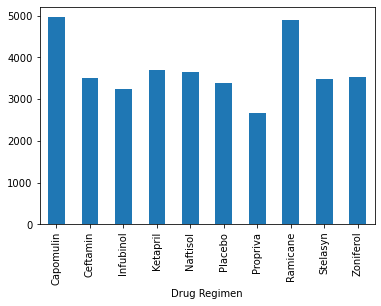

In [360]:
timepoints_by_drug = clean_full_df.groupby("Drug Regimen")["Timepoint"].agg("sum")
timepoint_plt = timepoints_by_drug.plot(kind="bar")



In [361]:
timepoints_by_drug

Drug Regimen
Capomulin    4960
Ceftamin     3515
Infubinol    3235
Ketapril     3705
Naftisol     3650
Placebo      3380
Propriva     2665
Ramicane     4885
Stelasyn     3480
Zoniferol    3525
Name: Timepoint, dtype: int64

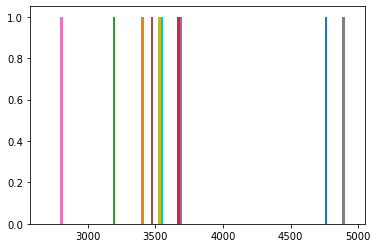

In [362]:
plt.hist(pd.DataFrame(timepoints_by_drug))
plt.show()

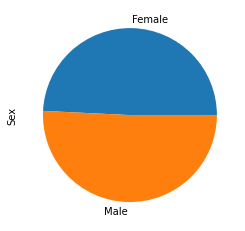

In [363]:
sex_distro = clean_full_df.groupby("Sex")["Sex"].count()
sex_distro.plot(kind="pie")


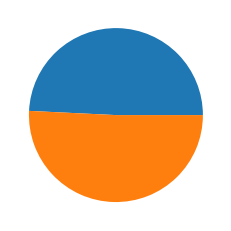

In [364]:
plt.pie(sex_distro)
plt.show()

In [365]:
special_meds = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]
latest_times = clean_full_df.groupby("Mouse ID")["Timepoint"].max()
mega = pd.merge(latest_times,clean_full_df,how="inner", on="Mouse ID")
final_vol = mega[mega["Timepoint_x"] == mega["Timepoint_y"]]
final_vol #Tumor Volume (mm3)



,Mouse ID,Timepoint_x,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y,Tumor Volume (mm3),Metastatic Sites
9,a203,45,Infubinol,Female,20,23,45,67.973419,2
19,a251,45,Infubinol,Female,21,25,45,65.525743,1
29,a262,45,Placebo,Female,17,29,45,70.717621,4
39,a275,45,Ceftamin,Female,20,28,45,62.999356,3
46,a366,30,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...,...
1846,z435,10,Propriva,Female,12,26,10,48.710661,0
1856,z578,45,Ramicane,Male,11,16,45,30.638696,0
1866,z581,45,Infubinol,Female,24,25,45,62.754451,3
1876,z795,45,Naftisol,Female,13,29,45,65.741070,3


In [366]:
simple = pd.DataFrame(final_vol[["Mouse ID", "Tumor Volume (mm3)", "Drug Regimen", "Weight (g)"]])
simple

,Mouse ID,Tumor Volume (mm3),Drug Regimen,Weight (g)
9,a203,67.973419,Infubinol,23
19,a251,65.525743,Infubinol,25
29,a262,70.717621,Placebo,29
39,a275,62.999356,Ceftamin,28
46,a366,63.440686,Stelasyn,29
...,...,...,...,...
1846,z435,48.710661,Propriva,26
1856,z578,30.638696,Ramicane,16
1866,z581,62.754451,Infubinol,25
1876,z795,65.741070,Naftisol,29


In [373]:
# ["Tumor Volume (mm3)"]
discrim = []

for drug in special_meds:
    discrim.append(pd.DataFrame(simple[simple["Drug Regimen"] == drug]))
discrim[0]

,Mouse ID,Tumor Volume (mm3),Drug Regimen,Weight (g)
183,b128,38.982878,Capomulin,22
216,b742,38.939633,Capomulin,21
499,f966,30.485985,Capomulin,17
522,g288,37.074024,Capomulin,19
542,g316,40.159220,Capomulin,22
654,i557,47.685963,Capomulin,24
680,i738,37.311846,Capomulin,20
700,j119,38.125164,Capomulin,23
713,j246,38.753265,Capomulin,21
889,l509,41.483008,Capomulin,21


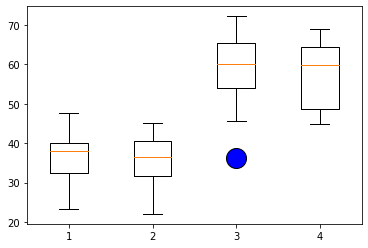

In [368]:
list_o_series = []
for i in discrim:
    list_o_series.append(i["Tumor Volume (mm3)"])
    
plt.boxplot(list_o_series, flierprops={"markerfacecolor":'b', "markersize":20})
plt.show()

In [369]:
mouska = discrim[0].iloc[0]
mouska

Mouse ID                   b128
Tumor Volume (mm3)      38.9829
Drug Regimen          Capomulin
Weight (g)                   22
Name: 183, dtype: object

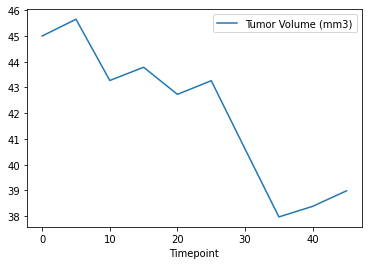

In [370]:
mouska_deets = clean_full_df[clean_full_df["Mouse ID"] == mouska["Mouse ID"]][["Timepoint","Tumor Volume (mm3)"]]
mouska_deets.plot(x="Timepoint")

,Weight (g),Tumor Volume (mm3)
Weight (g),1.000000,0.876706
Tumor Volume (mm3),0.876706,1.000000


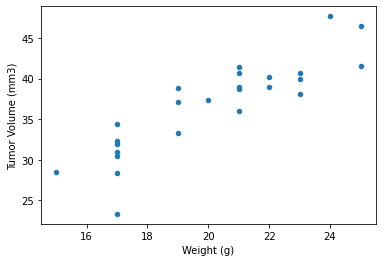

In [371]:
campo_weight = discrim[0][["Weight (g)", "Tumor Volume (mm3)"]]
campo_weight.plot(x="Weight (g)",y="Tumor Volume (mm3)",kind="scatter")
cor = campo_weight.corr()
cor

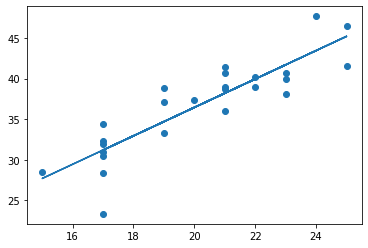

In [372]:

comp_lin_regr = st.linregress(campo_weight["Weight (g)"],campo_weight["Tumor Volume (mm3)"])
comp_m = comp_lin_regr[0]
comp_b = comp_lin_regr[1]
plt.scatter(x=campo_weight["Weight (g)"], y=campo_weight["Tumor Volume (mm3)"])
plt.plot(campo_weight["Weight (g)"], comp_m*campo_weight["Weight (g)"] + comp_b)
